Claim: "Furthermore, signatures derived from hematopoietic cells are elevated in tissue samples from patients with Stevens Johnsons disease, which are collected from blister fluid, along with mucosis fungoides, a T cell neoplasm, and sarcoidosis, which also typically has abundant granulomas."

Stat to Bootstrap around:  Ratio of hematopoietic sig score in SJ disease/ average of same score across all other skin diseases

# The hematopoietic signature score for SJ disease is significantly different from that of all other skin diseases

In [1]:
import pickle
import pandas as pd

df = pd.read_pickle("C:/Users/Melton/OneDrive/Documents/School/CASB185Proj/unnormalized_skin_diseases.txt.pkl")

In [2]:
df['Stevens Johnson syndrome']

GTEx skin - not sun exposed (suprapubic)    94.9336785714
GTEx skin - sun exposed (lower leg)         67.2396896552
WRS_Macrophage                              385.427340426
HBA_Pancreas                                46.0425918367
HBA_PancreaticIslet                         61.0551020408
                                                ...      
HPCA_Bronchial_Epithelial_cells                  64.72202
DermDB_Squamous cell carcinoma                   756.1288
HBA_Tonsil                                     538.833625
HBA_Tongue                                      233.49004
HBA_BronchialEpithelialCells                345.218693878
Name: Stevens Johnson syndrome, Length: 354, dtype: object

In [3]:
#Here is the list of hematopoietic signature scores

In [4]:
hema_list = []
for ind in df.index:
    if('WRS' in ind):
        hema_list.append(ind)

In [10]:
hema_sig_score_all = []

for type_of_cell in df.index:
    wrs_cell=0
    if('WRS' in type_of_cell):
        for val in df.loc[type_of_cell]:
            wrs_cell+=float(val)
        hema_sig_score_all.append(wrs_cell/24)

In [11]:
print(hema_sig_score_all)

[164.21322872346252, 60.762442176854165, 53.654620370354166, 39.547536231900004, 17.51088354700833, 25.390559210524998, 27.709121453912502, 37.9204991496625, 38.98296590909167, 40.388325181158336, 122.19452210880836, 104.36796014483747, 121.30876909720835, 111.33388000000001, 88.07423032409166, 62.209326530604166, 53.04531648937083, 61.81175520831667, 86.17996014487919, 101.43257336955416, 113.76347048615828, 125.64461944443333, 212.36210329855416, 728.4545720489876]


In [13]:
hema_sig_score_sj = [df.loc[item]['Stevens Johnson syndrome'] for item in hema_list]

[Text(0, 0, ''),
 Text(0, 1, ''),
 Text(0, 2, ''),
 Text(0, 3, ''),
 Text(0, 4, ''),
 Text(0, 5, ''),
 Text(0, 6, ''),
 Text(0, 7, ''),
 Text(0, 8, ''),
 Text(0, 9, ''),
 Text(0, 10, ''),
 Text(0, 11, ''),
 Text(0, 12, ''),
 Text(0, 13, ''),
 Text(0, 14, ''),
 Text(0, 15, ''),
 Text(0, 16, ''),
 Text(0, 17, ''),
 Text(0, 18, ''),
 Text(0, 19, ''),
 Text(0, 20, ''),
 Text(0, 21, ''),
 Text(0, 22, ''),
 Text(0, 23, '')]

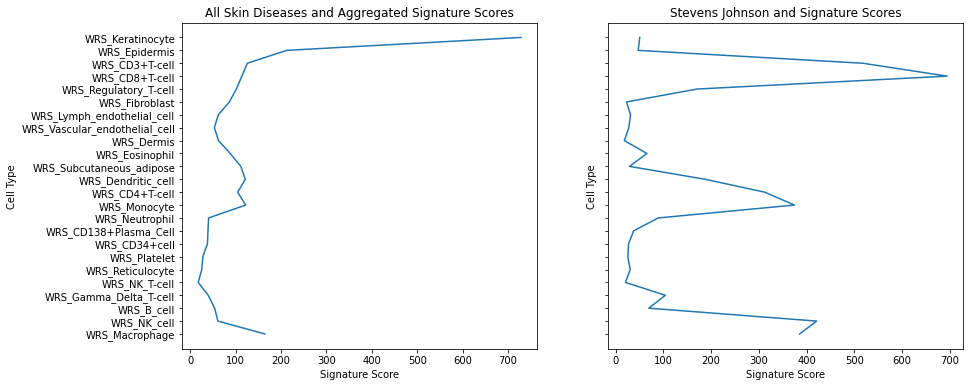

In [14]:
import matplotlib.pyplot as plt
y = list(map(float, hema_sig_score_sj))
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14, 6))
ax1.plot(hema_sig_score_all, hema_list)
ax1.set(xlabel='Signature Score', ylabel='Cell Type',
       title='All Skin Diseases and Aggregated Signature Scores')
ax2.plot(y, hema_list)
ax2.set(xlabel='Signature Score', ylabel='Cell Type',
       title='Stevens Johnson and Signature Scores')
ax2.set_yticklabels('')

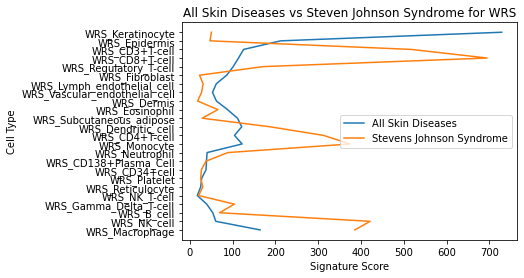

In [22]:
import matplotlib.pyplot as plt
y = list(map(float, hema_sig_score_sj))
fig, ax = plt.subplots()
a = ax.plot(hema_sig_score_all, hema_list)
a[0].set_label('All Skin Diseases')
ax.set(xlabel='Signature Score', ylabel='Cell Type',
       title='All Skin Diseases vs Steven Johnson Syndrome for WRS')
b = ax.plot(y, hema_list)
b[0].set_label('Stevens Johnson Syndrome')
ax.legend()